In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [ ]:
# Load Iris dataset
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

# Make it binary, There is 3 classes [0,1,2], drop y == 2
X = X.drop(y[y == 2].index)
y = y.drop(y[y == 2].index)

In [2]:
avg_X = np.average(X, axis=1)

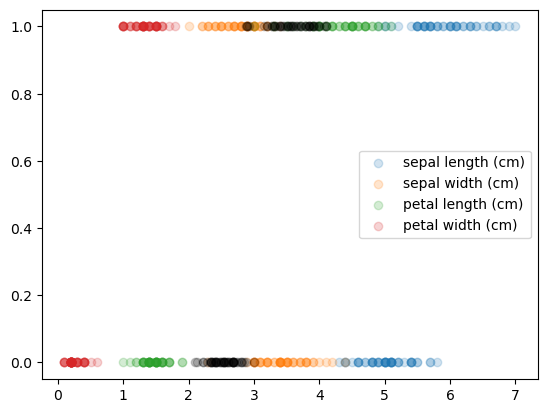

In [12]:
# Ever wonder, why many X, w, how it combine together?

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Each feature has diffrent to predict y
# This the bigger the 1, w of this feature should be +
ax.scatter(X.iloc[:,0], y, alpha=0.2)
# Only this one ther smaller the 1, w of this feature should be -
ax.scatter(X.iloc[:,1], y, alpha=0.2)
ax.scatter(X.iloc[:,2], y, alpha=0.2)
ax.scatter(X.iloc[:,3], y, alpha=0.2)
# For w of not relavant feature should be 0

# This is the avg of all features
ax.scatter(avg_X, y, c='k', alpha=0.2)
ax.legend(X)

plt.show()

# we need to adjust w1,w2,w3,w4 that when sigmoid(wTx + b) then the line is fit to the black dot

In [4]:
n_sample = X.shape[0]
n_feature = X.shape[1]

w = np.random.uniform(0, 0.1, [n_feature])
b = 0.5


def net_input(X, w, b):
    net_input = X.dot(w.T) + b
    return net_input


def activation(net_input):
    return 1.0 / (1 + np.exp(-net_input))


def logloss(target, predict):
    logloss = target * np.log(predict) + ((1-target) * np.log(1-predict))
    return logloss


def gradient(X, y, y_pred, learning_rate):
    
    error = y_pred - y
    
    # grad_w = error.T.dot(np.array(X)) / X.shape[0]
    grad_w = learning_rate * np.average((error * X.T).T, axis=0)
    # grad_b = error.sum() / X.shape[0]
    grad_b = learning_rate * np.average(error, axis=0)
    
    return grad_w, grad_b

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 : \text{where } \hat{y} = h(x_i) = wx + b$

We need partial derivetive instead

This mean finding the slope (rate of change) of w and b. using chain rule

$ \text{Gradient Descent = } \frac{2}{n} \sum_{i=1}^{n} [(\hat{y}_i - y_i)x_i] $

In [5]:
z = net_input(X, w, b)
y_pred = activation(z)

loss = logloss(y, y_pred)
np.average(loss)

-0.7496558730010848

In [6]:
grad_w, grad_b = gradient(X, y, y_pred, 2)

In [7]:
w = w - grad_w
b = b - grad_b

In [8]:
w_list = []
b_list = []

for i in range(100):
    z = net_input(X, w, b)
    predict = activation(z)
    
    loss = logloss(y, predict)
    print(np.average(loss))
    
    error = predict - y
    grad_w = 2 * np.average((error * X.T).T, axis=0)
    grad_b = 2 * np.average(error, axis=0)
    
    w = w - grad_w
    b = b - grad_b

    w_list.append(w)
    b_list.append(b)

-7.143191899520932
nan
-0.049245252704484856
-0.018616039000991725
-0.006919061268380965
-0.006326251871759284
-0.006129922689303576
-0.0060208868313147475
-0.005933643841505061
-0.005853215890447443
-0.005776056312695677
-0.0057012594104702075
-0.00562854238452077
-0.005557774957832595
-0.005488867447305617
-0.005421743364744466
-0.005356332402262728
-0.005292568462422613
-0.005230388977759326
-0.0051697345770482525
-0.005110548855082735
-0.005052778180950163
-0.004996371526379653
-0.004941280308270323
-0.004887458243018361
-0.0048348612113156145
-0.004783447132455431
-0.004733175847343349
-0.004684009009505307
-0.004635909983457605
-0.004588843749862108
-0.004542776816942329
-0.004497677137681761
-0.004453514032368073
-0.004410258116083575
-0.004367881230776379
-0.004326356381577783
-0.004285657677057995
-0.004245760273139069
-0.0042066403204051896
-0.004168274914572639
-0.0041306420498996455
-0.004093720575334336
-0.004057490153214366
-0.004021931220346092
-0.00398702495130488
-0.00

/Users/krit/homebrew/anaconda3/envs/dataeng/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


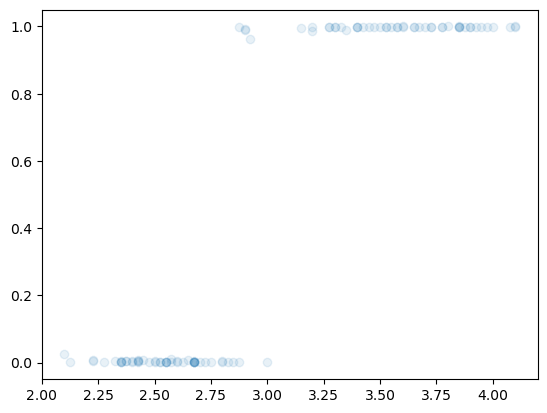

In [9]:
fig, ax = plt.subplots()

# Each feature has diffrent to predict y
#for i in range(0, len(w_list)):
ax.scatter(avg_X, activation(net_input(X, w_list[99], b_list[99])), alpha=0.1)
    
#ax.scatter(avg_X, y, c='k', alpha=0.2)
    
plt.show()

In [25]:
print(f'loss = {loss.iloc[-1]}')
print(w)
print(b)

loss = -0.0013760401526914088
[-0.74164407 -2.57843017  3.86280707  1.66049947]
0.04637898083727844
